In [1]:
import os
import pandas as pd
import json

def read_results_json_to_dataframe(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == "results.json":
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    try:
                        json_data = json.load(f)
                        data.append(json_data)
                    except json.JSONDecodeError:
                        print(f"Error decoding JSON in file: {file_path}")
    return pd.DataFrame(data)

# Example usage:
directory_path_0 =   "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1"
directory_path =     "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1"
directory_path_cp =  "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cp21_len63_time_div_v1"
directory_path_cp0 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnewma_21_len63_time_div_v1"
directory_path_cp1 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpbocd_21_len63_time_div_v1"


df = read_results_json_to_dataframe(directory_path)
print(df)

                                                 ALL  \
0  {'performance_sw': -0.7379766663272118, 'perfo...   
1  {'performance_sw': 3.125039629069106, 'perform...   
2  {'performance_sw': 1.2821066356516135, 'perfor...   
3  {'performance_sw': 1.828453695760621, 'perform...   
4  {'performance_sw': 1.612791946498317, 'perform...   

                                                COMB  
0  {'annual_return_2020_2021': -0.008045202835938...  
1  {'annual_return_2017_2018': 0.0365627810289408...  
2  {'annual_return_2018_2019': 0.0114553104205583...  
3  {'annual_return_2016_2017': 0.0244404840508021...  
4  {'annual_return_2019_2020': 0.0102673436861888...  


results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1
results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1
results_hpo/experiment_quandl_krisi_selected_assets_lstm_cp21_len63_time_div_v1
results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnewma_21_len63_time_div_v1
results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpbocd_21_len63_time_div_v1


,hidden_layer_size,dropout_rate,max_gradient_norm,learning_rate,batch_size
dir,,,,,
experiment_quandl_krisi_selected_assets_lstm_cp21_len63_time_div_v1,40.0,0.01,1.00,0.10,256.0
experiment_quandl_krisi_selected_assets_lstm_cpbocd_21_len63_time_div_v1,80.0,0.01,100.00,0.01,128.0
experiment_quandl_krisi_selected_assets_lstm_cpnewma_21_len63_time_div_v1,160.0,0.01,1.00,0.01,64.0
experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1,40.0,0.10,0.01,0.01,64.0


,hidden_layer_size,dropout_rate,max_gradient_norm,learning_rate,batch_size
dir_parent,,,,,
2016-2017,80.0,0.01,1.00,0.01,128.0
2017-2018,80.0,0.10,1.00,0.10,64.0
2018-2019,20.0,0.01,1.00,0.01,64.0
2019-2020,40.0,0.01,0.01,0.01,128.0
2020-2021,160.0,0.10,100.00,0.10,64.0


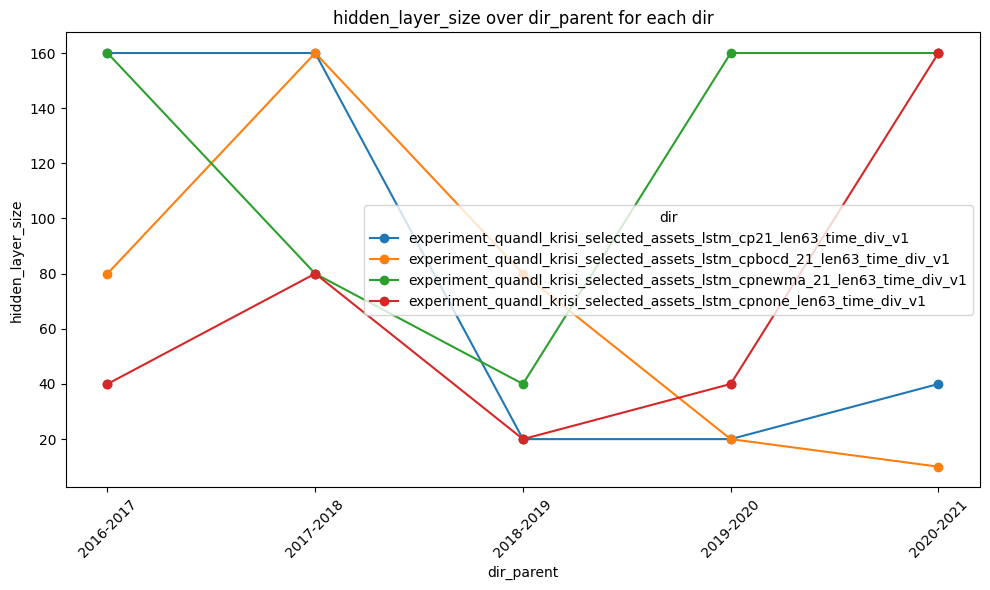

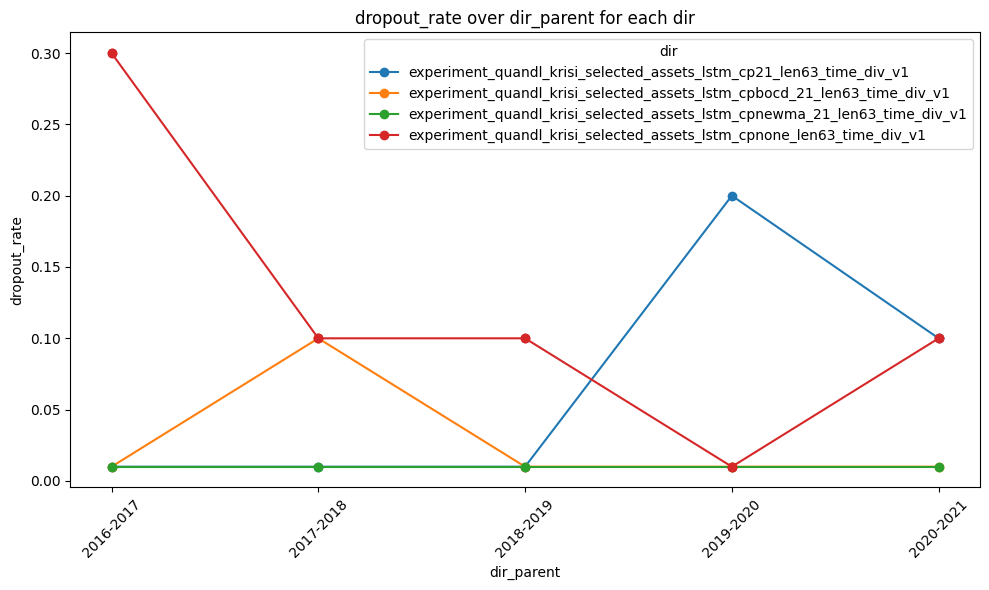

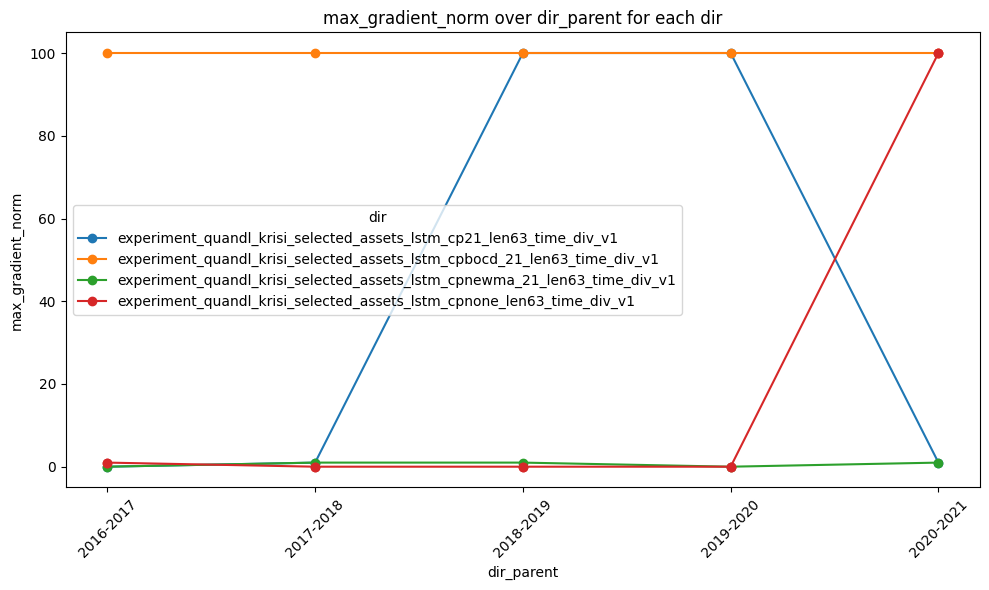

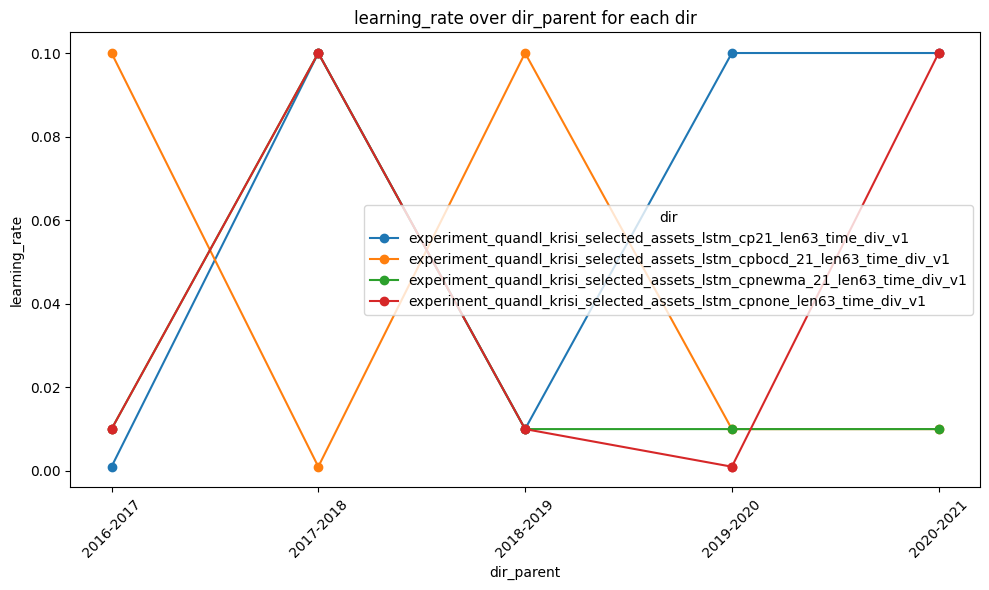

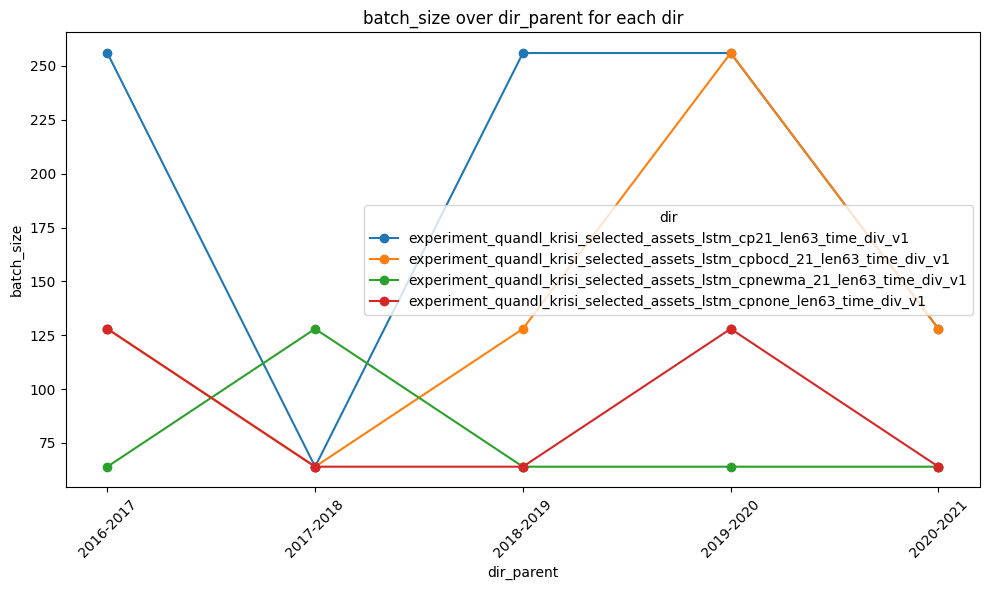

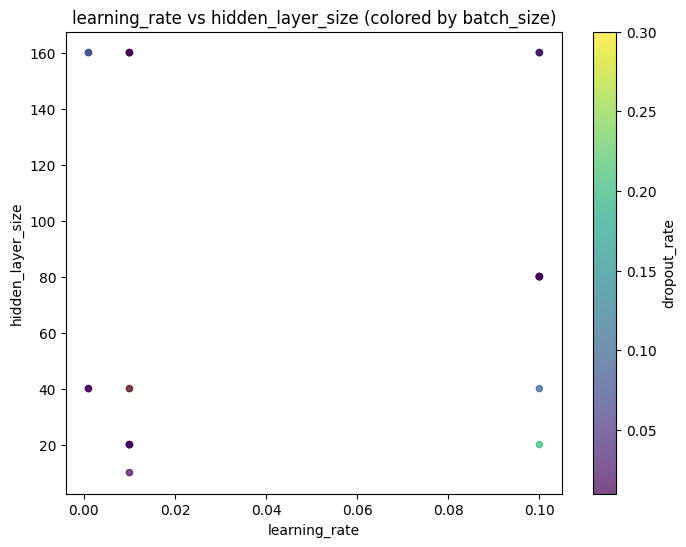

In [2]:
import matplotlib.pyplot as plt
def read_best_hyperparameters_to_dataframe(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == "best_hyperparameters.json":
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r') as f:
                        json_data = json.load(f)
                        json_data["dir_parent"] = file_path.split("/")[-2]
                        data.append(json_data)
                except json.JSONDecodeError:
                    print(f"Error decoding JSON in file: {file_path}")
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")
    return pd.DataFrame(data)

def read_best_hyperparameters_from_dirs(paths):
    dfs = []
    for path in paths:
        df = read_best_hyperparameters_to_dataframe(path)
        print(path)
        df["dir"] = path.split("/")[-1]  # Add directory name as a column
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Example usage:
paths = [directory_path_0, directory_path, directory_path_cp, directory_path_cp0, directory_path_cp1]
best_hyperparams_df = read_best_hyperparameters_from_dirs(paths)
display(best_hyperparams_df.groupby("dir").median(numeric_only=True))
display(best_hyperparams_df.groupby("dir_parent").median(numeric_only=True))
best_hyperparams_df.set_index(["dir_parent","dir"]).sort_index()
# Plot each hyperparameter's value over dir_parent for each dir
hyperparams = ["hidden_layer_size", "dropout_rate", "max_gradient_norm", "learning_rate", "batch_size"]

for hp in hyperparams:
    fig, ax = plt.subplots(figsize=(10, 6))
    for dir_name, group in best_hyperparams_df.sort_values("dir_parent").groupby("dir"):
        ax.plot(group["dir_parent"], group[hp], marker='o', label=dir_name)
    ax.set_xlabel("dir_parent")
    ax.set_ylabel(hp)
    ax.set_title(f"{hp} over dir_parent for each dir")
    ax.legend(title="dir")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
best_hyperparams_df.plot.scatter(x="learning_rate", y="hidden_layer_size", c="dropout_rate", colormap="viridis", figsize=(8,6), alpha=0.7)
plt.title("learning_rate vs hidden_layer_size (colored by batch_size)")
plt.xlabel("learning_rate")
plt.ylabel("hidden_layer_size")
plt.show()


In [3]:
best_hyperparams_df

,hidden_layer_size,dropout_rate,max_gradient_norm,learning_rate,batch_size,dir_parent,dir
0,160,0.10,100.00,0.100,64,2020-2021,experiment_quandl_krisi_selected_assets_lstm_c...
1,80,0.10,0.01,0.100,64,2017-2018,experiment_quandl_krisi_selected_assets_lstm_c...
2,20,0.10,0.01,0.010,64,2018-2019,experiment_quandl_krisi_selected_assets_lstm_c...
3,40,0.30,1.00,0.010,128,2016-2017,experiment_quandl_krisi_selected_assets_lstm_c...
4,40,0.01,0.01,0.001,128,2019-2020,experiment_quandl_krisi_selected_assets_lstm_c...
5,160,0.10,100.00,0.100,64,2020-2021,experiment_quandl_krisi_selected_assets_lstm_c...
6,80,0.10,0.01,0.100,64,2017-2018,experiment_quandl_krisi_selected_assets_lstm_c...
7,20,0.10,0.01,0.010,64,2018-2019,experiment_quandl_krisi_selected_assets_lstm_c...
8,40,0.30,1.00,0.010,128,2016-2017,experiment_quandl_krisi_selected_assets_lstm_c...
9,40,0.01,0.01,0.001,128,2019-2020,experiment_quandl_krisi_selected_assets_lstm_c...


In [4]:
def read_captured_returns_to_dataframe(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == "captured_returns_sw.csv":
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)
                    data.append(df)
                except pd.errors.EmptyDataError:
                    print(f"Empty file encountered: {file_path}")
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")
    return pd.concat(data, ignore_index=True) if data else pd.DataFrame()

# Example usage:
def get_combined_captured_returns_df(names, paths):
    dfs = []
    for name, path in zip(names, paths):
        df = read_captured_returns_to_dataframe(path)
        df["cp"] = name
        dfs.append(df)
    return pd.concat(dfs, ignore_index=False)

# Example usage:
names = ["oldnone","none", "cp21", "newmacp21", "bocp21"]
paths = [directory_path_0, directory_path, directory_path_cp, directory_path_cp0, directory_path_cp1]
combined_df = get_combined_captured_returns_df(names, paths)
print(combined_df)


       Unnamed: 0 identifier        time   returns  position  \
0               0     ICE_SB  2020-01-02  0.010968  0.132010   
1               1     ICE_SB  2020-01-03  0.025172  0.004697   
2               2     ICE_SB  2020-01-06 -0.007491 -0.208118   
3               3     ICE_SB  2020-01-07 -0.006496 -0.025468   
4               4     ICE_SB  2020-01-08  0.013179 -0.056657   
...           ...        ...         ...       ...       ...   
63100       12654     CME_NQ  2019-12-24  0.011458  0.283733   
63101       12655     CME_NQ  2019-12-26 -0.003199  0.342552   
63102       12656     CME_NQ  2019-12-27 -0.007633  0.232194   
63103       12657     CME_NQ  2019-12-30  0.002860  0.134289   
63104       12658     CME_NQ  2019-12-31  0.021882  0.229140   

       captured_returns  daily_vol  captured_returns_0_5_bps  \
0              0.001448   0.011810                  0.001448   
1              0.000118   0.011845                  0.000113   
2              0.001559   0.012863     

captured_returns_dfq

In [5]:
# captured_returns_df["time"] = pd.to_datetime(captured_returns_df["time"])
captured_returns_df = combined_df
df_plt = captured_returns_df.drop(['Unnamed: 0',], axis = 1).set_index(["cp","time","identifier"]).mean(level=[0,1]).sort_index()
df_plt["captured_returns_cum"]=1+df_plt["captured_returns"]
# df_plt = df_plt[df_plt.index.get_level_values("time") > "2018-01-01"]
# df_plt["captured_returns_cum"][0] = 1
q = (df_plt.groupby("cp")["captured_returns_cum"].cumprod()*100)
df_plt["returns_cum"]=1+df_plt["returns"]
# df_plt["captured_returns_cum"][0] = 1
q1 = (df_plt.groupby("cp")["returns_cum"].cumprod()*100)
# .plot(figsize=(15, 5), title="Mean Captured Returns Over Time")
# captured_returns_df.columns


/tmp/ipykernel_3430829/725160081.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_plt = captured_returns_df.drop(['Unnamed: 0',], axis = 1).set_index(["cp","time","identifier"]).mean(level=[0,1]).sort_index()


In [6]:
q.index.unique(level=0).tolist()

['bocp21', 'cp21', 'newmacp21', 'none', 'oldnone']

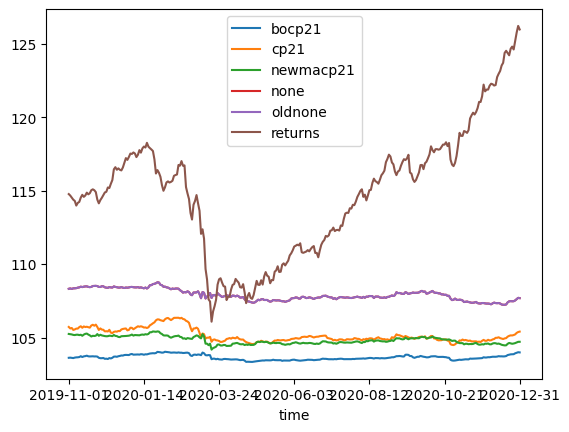

In [7]:
import matplotlib.pyplot as plt
labels = q.index.get_level_values(0).unique().tolist()

def plot_cum_returns(q, labels=None, title=None, start_date=None):
    if labels is None:
        labels = q.index.get_level_values(0).unique().tolist()
    for cp in labels:
        if cp in q.index.get_level_values(0):
            data = q.xs(cp)
            if start_date is not None:
                # Try to filter by date if possible
                try:
                    data = data[data.index >= start_date]
                except Exception:
                    pass
            data.plot(label=cp)
    if title:
        plt.title(title)
    plt.legend()

plot_cum_returns(q, labels, start_date  ="2019-11-01")
q1.xs("bocp21")[q1.xs("bocp21").index >= "2019-11-01"].plot(label="returns")

# plt.title("Mean Captured Returns Over Time")
# plt.ylabel("Captured Returns (%)")
# plt.xlabel("Time")
plt.legend()
plt.show()

<AxesSubplot: xlabel='time'>

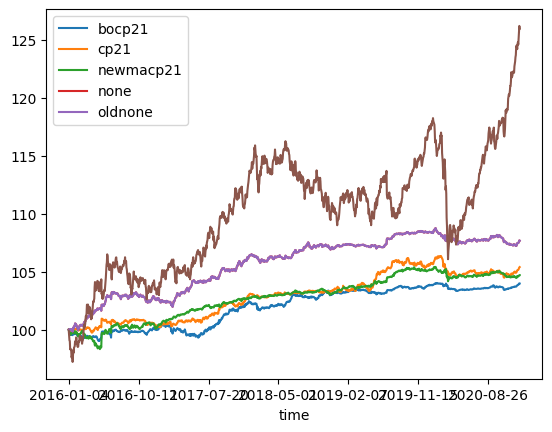

In [8]:
plot_cum_returns(q, labels)
q1.xs("bocp21").plot(label="returns")


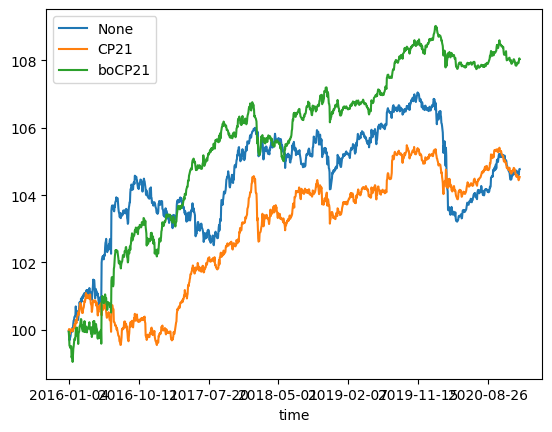

In [91]:
import matplotlib.pyplot as plt
q.xs("none").plot(label="None")
q.xs("cp21").plot(label="CP21")
q.xs("bocp21").plot(label="boCP21")

plt.legend()
# q.xs("cp21").plot()

<AxesSubplot: title={'center': 'ICE Coffee C Price'}, xlabel='date'>

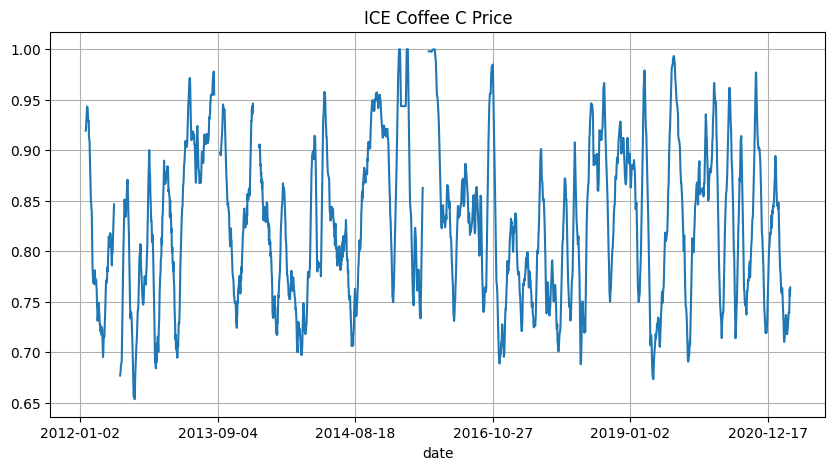

In [23]:
file_path = "/home/mkoshil/Documents/projects/second_thesis/trading-momentum-transformer/data/quandl_cpd_21lbw/LIFFE_W.csv"
df_cpd = pd.read_csv(file_path)
df_cpd = df_cpd.set_index('date')
df_cpd['moving_avg'] = df_cpd['cp_score'].rolling(window=21).mean()
df_cpd
df_cpd["moving_avg"].plot(figsize=(10, 5), title='ICE Coffee C Price', grid=True)

